# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

The following packages have been used to run the code for this assignment. 

In [153]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Question 1

We begin by defining all known parameters and writing up functions for every given equations in the assignment. Afterwards, we use optimize from the scipy-package in a function that solves that maximizes utility given consumption and minimizing labor supply.

In [154]:
#Defining parameters.
m=1 #cash-on-hand.
v=10 #scales the disutility of labor.
eps=0.3 #elasticity of labor supply
tau0=0.4 #standard labor income tax.
tau1=0.1 #top bracket labor income tax.
kappa=0.4 #the cut-off for the top labor income bracket.
w=1 #wage rate set with the initial value 1.

#Defining utility as a function of labour supply and consumption seen in eq(1).
def u_func(l, c, eps, v):
    u = np.log(c) - v * l**(1+1/eps) / (1+1/eps)
    return u

#Defining function for consumption, where c*=x because of monoticity seen from eq(2).
def c_func(m, w, l, tau0, tau1, kappa):
    c_def = m + w * l - w * l * tau0 - tau1 * max((w*l-kappa), 0)
    return c_def

#Defining the utility constraint such that c=c_func.
def u_con(l, w, eps, v, tau0, tau1, kappa):
    c=c_func(m, w, l, tau0, tau1, kappa)
    return -u_func(l, c, eps, v)

#Defining a function for the solution of the utility maximization problem. 
def sol(w,eps,v,tau0,tau1,kappa,m):
    l_sol = optimize.minimize_scalar(u_con, method='bounded',bounds=(0,1), args=(w,eps,v,tau0, tau1, kappa))
    l_ss=l_sol.x
    c_ss=c_func(m,w,l_ss,tau0,tau1,kappa)
    u_ss=u_func(l_ss,c_ss,eps,v)
    return [l_ss,c_ss,u_ss]

l_ss = sol(w, eps, v, tau0, tau1, kappa, m)[0]
c_ss = sol(w, eps, v, tau0, tau1, kappa, m)[0]
u_ss = sol(w, eps, v, tau0, tau1, kappa, m)[0]

print("Optimal Labour is ", l_ss)
print("Optimal consumption is ", c_ss)
print("Optimal utility is ", u_ss)


Optimal Labour is  0.40000068196481897
Optimal consumption is  0.40000068196481897
Optimal utility is  0.40000068196481897


We have know created a function that will solve the utility maximization problem faced by consumers. 

# Question 2

The assignment asks us to plot labor supply (l*) and consumption (c*) in steady state when we have 10.000 observations and the wage rate is given in a ratio from 0.5 to 1.5. We define vectors for wage rate, consumption and labor supply using numpy array and and use the previosly defined function (sol) that solves the maximization problem. 

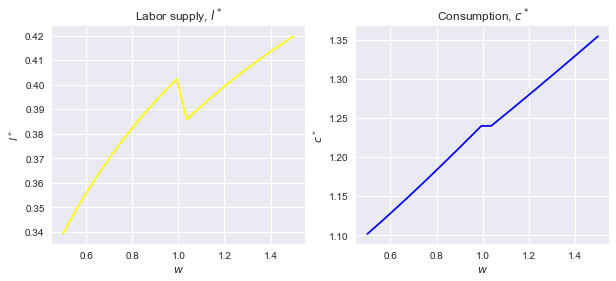

In [155]:
#Set number of observations.
N=10000

plt.style.use("seaborn")

#Generate vectors for labour supply, consumption and wages.
w_vec = np.linspace(0.5, 1.5, N) #this linespace() command return evenly spaced numbers over a specified interval.
l_vec = np.empty(N) #returns a new array of given (same N) shape and type, without initializing entries.
c_vec = np.empty(N) #returns a new array of given (same N) shape and type, without initializing entries.

#Enumerating for w
for i,w in enumerate(w_vec):
    l_vec[i], c_vec[i], _ = sol(w, eps, v, tau0, tau1, kappa, m)

#Defining the figure's.
fig = plt.figure(figsize=(10,4))

#Left-side plot.
ax_left=fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec,color='yellow')

ax_left.set_title('Labor supply, $l^*$')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^*$')
ax_left.grid(True)

#Right-side plot.
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_vec,color='blue')

ax_right.set_title('Consumption, $c^*$')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(True)

#Ploting figure. 
plt.show()

It's clear that there is a positive correlation between wage rate and labor supply. This also applies for wage rate and consumption. It can also be seen that labor supply and consumption is within the set bounderies $l\in[0,1]$ and $c\in[0,x]$. This indicates that the substitution effects dominate the income effect when it comes to labor supply. However, it can be seen that for w = 1, and kappa = 0.4, labor supply falls as workers faces higher taxation in the upper income bracket, which makes leisure relatively cheaper. This effect causes workers to substitute towards leisure which reduces the overall labor supply.



# Question 3

It is said that the wage rate is uniform $w\in[0.5,1.5]$ and we still have 10.000 individuals in our economy. Thereto, we set a seed number so we can recall any randomly generated values. Using this information we create a vector for wage rate consisting of random values within the uniform distribution . Further, we also define a vector for labor supply where we in both cases use numpy's array command. Then we define the given function for total tax revenue.

In [161]:
#Defining the uniform distribution of wage rate with random values saved by a seed number. 
N=10000
np.random.seed(100)
w_uni=np.random.uniform(low=0.5,high=1.5,size=N)

#Defining optimal labor supply by creating an empty list and iterating each wage rate. 
l_opt = np.empty(N) #this np.empty-command returns a new array of given (same N) shape and type, without initializing entries.
for i,w in enumerate(w_uni):
    lc_bundle = sol(w,eps,v,tau0,tau1,kappa,m)
    l_opt[i] = lc_bundle[0]

#Defining total tax revenue.  
def tax_rev(l_list): #this function uses a list of every individual labor supplier as parameter.
    #creating empty list to contain every revenue of each individual's paid tax.
    tax_list = np.empty(10000)
    #calculating the individual consumer tax revenue and summing it up.
    for i in range(10000):
        tax_list[i] = tau0*w_uni[i]*l_list[i]+tau1*np.max(w_uni[i]*l_list[i]-kappa,0)
    #returning the total sum of tax revenue. 
    return np.sum(tax_list)

#Print out total revenue. 
print("Total tax revenue is ", tax_rev(l_opt))


Total tax revenue is  1566.7784971226633


We have now calculated the total tax revenue given before mentioned information.

# Question 4

This is almost the same procedure as the former question. We start by setting epsilion equal to the new value of 0.1 and again calculate the total tax revenue. 

In [160]:
#Defining new epsilion to the value of 0.1 given in the assignment. 
eps_new=0.1

#Redefining optimal labor supply and consumption given the new epsilion value. 
l_opt_new = np.empty(N)
c_opt_new = np.empty(N)
for i,w in enumerate(w_uni):
    lc_bundle=sol(w,eps_new,v,tau0,tau1,kappa,m)
    l_opt_new[i] = lc_bundle[0]
    c_opt_new[i] = lc_bundle[1]

#Print out total tax revenue for this new case. 
print("Total tax revenue is ", tax_rev(l_opt_new))


Total tax revenue is  3186.0281714087564


In this case the total tax revenue is now larger then in the former case.

# Question 5

In this question we will find the optimal economical parameter values which will maximize total tax revenue for the government given consumer behavior. 

In [159]:
#Changing epsilon back to initial value.
eps = 0.3

#Redefining the population.
N = 10000

#Defining a function for the total tax.
def total_tax(v):
    tau0_vec=v[0]
    tau1_vec=v[1]
    kappa_vec=v[2]
    w_vec_new=v[3]
    l_vec_new=v[4]

#The sum of e all tax paid from each agent is equal to the total tax revenue.
    total_tax_rev = np.sum(tau0_vec*w_vec_new*l_vec_new + tau1_vec*np.max(w_vec_new*l_vec_new-kappa_vec,0))
    return total_tax_rev

#Defining a new budget constraint using vectors.
def u_con_new(v):
    tau0_vec=v[0]
    tau1_vec=v[1]
    kappa_vec=v[2]
    w_vec_new=v[3]
    l_vec_new=v[4]
    u_con_new = m * v[3] * v[4] - (v[0]*v[3]*v[4]+v[1]*np.max(v[3]*v[4]-v[2],0))
    return u_con_new

#Defining the function for the optimal total tax revenue. 
def opt_total_tax(v):
    tau0_vec=v[0]
    tau1_vec=v[1]
    kappa_vec=v[2]
    w_vec_new=v[3]
    l_vec_new=v[4]
    c_new = u_con_new(v)
    return -total_tax(v)

#We create an initial guess based upon the given parameters from question (1).
guess=[0.4,0.1,0.4,1,0.5]

#Then we create bounds for each parameter. 
bounds = ((0,1),(0,1),(0,1),(0,1.5),(0,1))

#Also we create constraints.
constraints = ({"type":"ineq","fun":u_con_new})

#Using SLSQP we optimize the optimal tax revenue function.
opt_total_tax_func = optimize.minimize(opt_total_tax,guess,bounds=bounds,constraints=constraints,method="SLSQP")

#Unpacking results from the optimizer.
tau0_new = opt_total_tax_func.x[0]
tau1_new = opt_total_tax_func.x[1]
kappa_new = opt_total_tax_func.x[2]

#Create empty list. 
l = np.empty(N)

#Calculate the tax revenue of each individual given the newly found optimal parameters.
for i in range(N):
    l[i] = tau0_new*w_new*l_new + tau1_new*max([w_new*l_new-kappa_new,0])

#Sum to find the total tax revenue.
tax_rev_new = sum(l)

#Printing out the results.
print("Optimal standard labour income tax is ", opt_total_tax_func.x[0])
print("Optimal top-bracket labour income tax t1 is ",opt_total_tax_func.x[1])
print("Optimal cut-off for the top labour income bracket is ", opt_total_tax_func.x[2])
print("The total tax revenue given optimal values is ", tax_rev_new)


Optimal standard labour income tax is  0.8825863861817863
Optimal top-bracket labour income tax t1 is  0.14679469056923133
Optimal cut-off for the top labour income bracket is  0.3002262204011014
The total tax revenue given optimal values is  15000.000000018441


It's clear to see that total tax revenue is greater then the results of question (3) and (4) which also indicates that the code used is correct. 

# Conclusion

This assignment seeks to analyze, how labor supply, consumption and wage rate interact's and effect an economy given certain scenarios. We have learned that wage rate is positively correlated with labor supply and consumption respectively. Effects from changes in the elasticity of labor supply was also analyzed. We concluded that a lower elasticity of labor supply will increase the tax revenue given nothing els changes. 